In [96]:
import numpy as np
import matplotlib.pyplot as plt

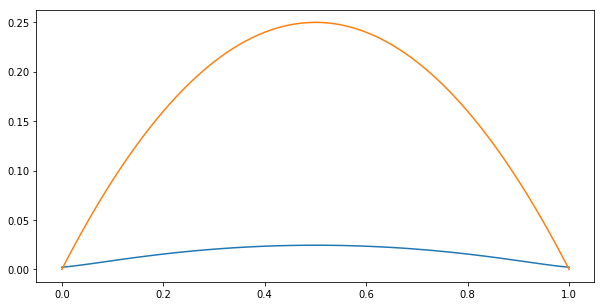

In [97]:
a = 20

def f(t):
    return t * (1 - t)

def g(s):
    return 2 / a * (1 - s) * s + \
        1 / (a ** 2) * (np.exp(-a * s) + np.exp(-a * (1 - s))) + \
        2 / (a ** 3) * (np.exp(-a * s) + np.exp(-a * (1 - s)) - 2)

s_grid = np.linspace(0, 1, num=101)
t_grid = np.linspace(0, 1, num=81)

plt.figure(figsize=(10,5))
plt.plot(s_grid, g(s_grid), t_grid, f(t_grid))

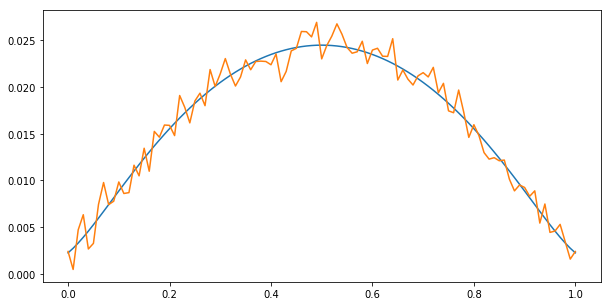

In [98]:
def A_f(i, j):
    return 1 / 80 * np.exp(-20 * np.abs(t_grid[j] - s_grid[i]))

A = np.fromfunction(A_f, (101, 81), dtype=int)

std_dev = 0.05 * np.max(g(s_grid))
noise = np.random.normal(0, std_dev, (101,))
g_noise = g(s_grid) + noise

plt.figure(figsize=(10,5))
plt.plot(s_grid, g(s_grid), s_grid, g_noise)

(-1.7, 2.3)

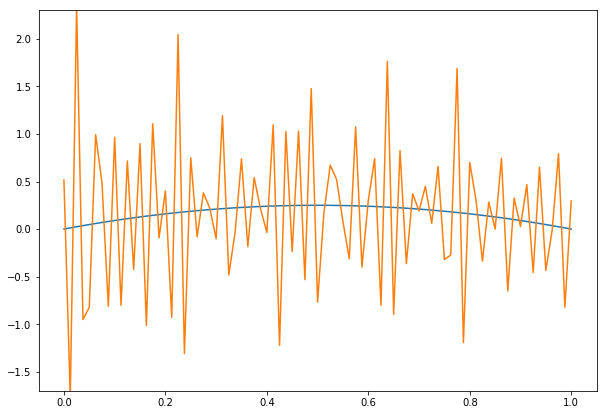

In [119]:
f_minnorm = np.linalg.pinv(A).dot(g_noise)
plt.figure(figsize=(10,7))
plt.plot(t_grid, f(t_grid), t_grid, f_minnorm)
plt.ylim(-1.7, 2.3)

In [114]:
# Now to Landweber-Friedman iteration...
eps = 9 * np.std(noise)
beta = 0.2 / (np.linalg.norm(A, ord=2)) ** 2
f_n = np.zeros((81,))

def T(f, beta, g_noise):
    return f + beta * (A.T.dot(g_noise) - A.T.dot(A).dot(f))

i = 0
while(np.linalg.norm(A.dot(f_n) - g_noise) > eps and i < 2000):
    if i % 100 == 0:
        print("{}: {}".format(i, np.linalg.norm(A.dot(f_n) - g_noise)))
    f_n = T(f_n, beta, g_noise)
    i += 1

0: 0.18045761117806272
100: 0.011741001796147971


156


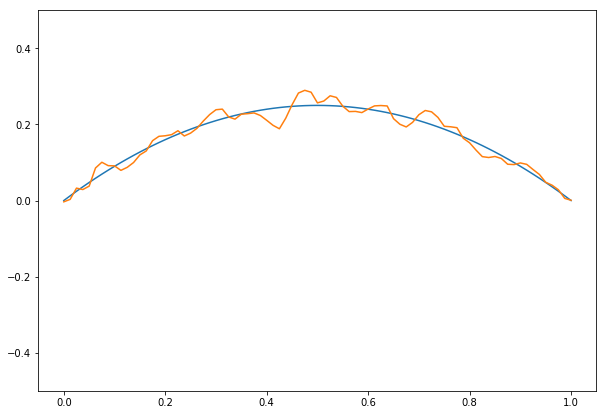

In [120]:
plt.figure(figsize=(10,7))
plt.plot(t_grid, f(t_grid), t_grid, f_n)
plt.ylim(-0.5, 0.5)
print(i)